# Artificial and Computational Intelligence Assignment 1

## Problem solving by Informed Search and/or Local Search

List only the BITS (Name) of active contributors in this assignment:
1. Sunil Mittal
2. Vikram
3. Indira
4. Kirti

Things to follow
1.	Use appropriate data structures to represent the graph and the path using python libraries
2.	Provide proper documentation
3.	Find the path and print it

Coding begins here

### 1.	Define the environment in the following block

There are two agents named R1 and G1. Both are searching for a "heart" as shown in the
below configuration as “H” that gives everlasting power. Both agents are trying to reach the
heart. In this process many obstacles may be encountered to reach the heart. Help them in
finding the best path to reach the heart from any arbitrary start positions. [Dynamically fetch
the start position while executing the code]

For the agent R1 the obstacle is the green room. If R1 enters the green room it incurs a
penalty of +10 cost and if it uses the red room it incurs a penalty of -10 points. For the agent
G1 the obstacle is the red room. If G1 enters the red room it incurs a penalty of +10 cost and
if it uses the green room it incurs a penalty of -10 points. In addition to the given cost, for
every transition an agent visits incurs a path cost of 1.
For any arbitrary node “n” the heuristic to reach the Heart h(n) is given by the below:
Manhattan distance + Color Penalty

where, Color Penalty = +5 if the node “n” and goal node is in different colored room
and Color Penalty = -5 if the node “n” and goal node is in same colored room
Use the Greedy Best First Search algorithm for both the below configurations and interpret
which agent works well in which environment. Justify your interpretation with relevant
performance metrics.

Note: The agents are not competing with each other. You need to run the simulation for both
agents in each of the below scenarios separately & submit the results of 4 runs.

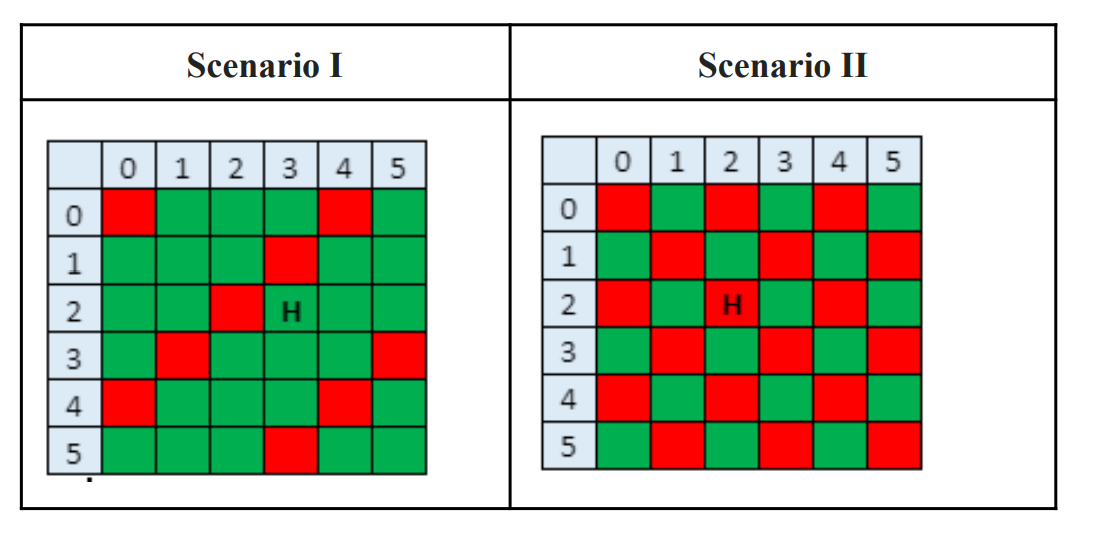


Design the agent as PSA Agent(Problem Solving Agent) 
Clear Initial data structures to define the graph and variable declarations is expected 
IMPORTATANT: Write distinct code block as below

In [1]:
#Code Block : Set Initial State (Must handle dynamic inputs)
import heapq

In [2]:
#Code Block : Set the matrix for transition & cost (as relevant for the given problem)
graph = {
'A': ['B', 'C', 'D'],
'B': ['A', 'E', 'F'],
'C': ['A', 'G', 'H'],
'D': ['A', 'I', 'J'],
'E': ['B', 'K', 'L'],
'F': ['B', 'M', 'N'],
'G': ['C', 'O', 'P'],
'H': ['C', 'Q', 'R'],
'I': ['D', 'S', 'T'],
'J': ['D', 'U', 'V'],
'K': ['E', 'W', 'X'],
'L': ['E', 'Y', 'Z'],
'M': ['F', 'H', 'I'],
'N': ['F', 'J', 'K'],
'O': ['G', 'L', 'M'],
'P': ['G', 'N', 'O'],
'Q': ['H', 'P', 'Q'],
'R': ['H', 'R', 'S'],
'S': ['I', 'T', 'U'],
'T': ['I', 'V', 'W'],
'U': ['J', 'X', 'Y'],
'V': ['J', 'Z', 'A'],
'W': ['K', 'B', 'C'],
'X': ['K', 'D', 'E'],
'Y': ['L', 'F', 'G'],
'Z': ['L', 'H', 'I']
}

In [ ]:
#Code Block : Write function to design the Transition Model/Successor function. Ideally this would be called while search algorithms are implemented
def heuristic(node, goal):
    x1, y1 = node
    x2, y2 = goal
    manhattan = abs(x1 - x2) + abs(y1 - y2)
    color_penalty = 5 if node[0] != goal[0] else -5
    return manhattan + color_penalty

In [ ]:
#Code block : Write fucntion to handle goal test (Must handle dynamic inputs). Ideally this would be called while search algorithms are implemented
def cost(current, neighbor, agent):
    if agent == 'R1':
        if neighbor[0] == 'G':
            return 10
        elif neighbor[0] == 'R':
            return -10
    elif agent == 'G1':
        if neighbor[0] == 'R':
            return 10
        elif neighbor[0] == 'G':
            return -10
    return 1

### 2.	Definition of Algorithm 1 (Mention the Name of the algorithm here eg., INFORMED SEARCH 

In [ ]:
#Code Block : Function for algorithm 1 implementation
def a_star_search(start, goal, graph, heuristic):
    # Create a priority queue to store the unexplored nodes
    frontier = []
    # Push the start node into the priority queue with a cost of 0
    heapq.heappush(frontier, (0, start))
    # Create a dictionary to store the costs of the nodes
    costs = {start: 0}
    # Create a dictionary to store the parents of the nodes
    parents = {start: None}
    # Create a variable to store the optimal path
    path = []
    # Loop until the priority queue is empty
    while frontier:
        # Pop the node with the lowest cost from the priority queue
        current_cost, current_node = heapq.heappop(frontier)
        # If the current node is the goal node, construct the path and return it
        if current_node == goal:
            while current_node is not None:
                path.append(current_node)
                current_node = parents[current_node]
                return path[::-1]
        # Iterate through the neighbors of the current node
        for neighbor in graph[current_node]:
            # Calculate the cost of reaching the neighbor from the start node
            cost = costs[current_node] + 1
            # If the neighbor has not been explored or the new cost is lower than the previous cost, update the cost and parent of the neighbor
            if neighbor not in costs or cost < costs[neighbor]:
                costs[neighbor] = cost
                priority = cost + heuristic(neighbor, goal)
                heapq.heappush(frontier, (priority, neighbor))
                parents[neighbor] = current_node
                # If the priority queue is empty, return an empty path
                return path

### 3.	Definition of Algorithm 2 (Mention the Name of the algorithm here eg., LOCAL SEARCH 

In [ ]:
#Code Block : Function for algorithm 2 implementation
# Define the start and goal nodes
start = 'A'
goal = 'H'

# Define the graph as a dictionary
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B', 'G'],
    'E': ['B', 'G'],
    'F': ['C', 'G'],
    'G': ['D', 'E', 'F', 'H'],
    'H': ['G']
}

# Define the heuristic function
def heuristic(node, goal):
    # Calculate the Manhattan distance between the node and the goal
    manhattan_distance = abs(node[0] - goal[0]) + abs(node[1] - goal[1])
    # Add the color penalty
    if node[2] != goal[2]:
        color_penalty = 5
    else:
        color_penalty = -5
    # Return the total heuristic cost
    return manhattan_distance + color_penalty

# Run the A* search
path = a_star_search(start, goal, graph, heuristic)

# Print the optimal path
print(f"Optimal path: {path}")


### DYNAMIC INPUT

IMPORTANT : Dynamic Input must be got in this section. Display the possible states to choose from:
This is applicable for all the relevent problems as mentioned in the question. 

In [ ]:
#Code Block : Function & call to get inputs (start/end state)

### 4.	Calling the search algorithms

In [ ]:
#Invoke algorithm 1 (Should Print the solution, path, cost etc., (As mentioned in the problem))

In [ ]:
#Invoke algorithm 2 (Should Print the solution, path, cost etc., (As mentioned in the problem))

### 5.	Comparitive Analysis

In [ ]:
#Code Block : Print the Time & Space complexity of algorithm 1 

In [ ]:
#Code Block : Print the Time & Space complexity of algorithm 2

### 6.	Provide your comparitive analysis or findings in no more than 3 lines in below section

Comparison : _______________________________________________

________________________________________________________

_________________________________________________________